In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def get_mean_std(data):
    n = len(data)
    mean = sum(data) / n
    dev = [(x - mean)**2 for x in data]
    var = sum(dev) / n
    std = np.sqrt(var)
    return mean, std

base_dir = '/media/data2/eunju/distance/'

methods = ['DeepFake', 'DeepFakeDetection', 'Face2Face', 'FaceSwap', 'NeuralTextures']
tests = ['test1', 'test2', 'test3', 'test4', 'test5']
classes = ['fake', 'real']

plots = [[[[] for _ in range(2)] for _ in range(5)] for _ in range(5)]

In [11]:
name = [0,'ResNet-DFDC','ResNet-PGGAN','Xception-DFDC','Xception-PGGAN']

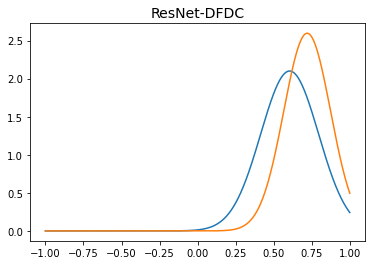

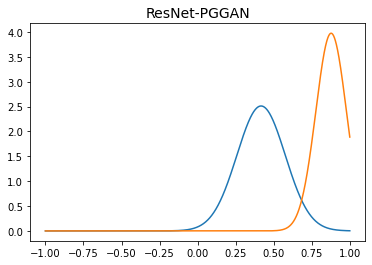

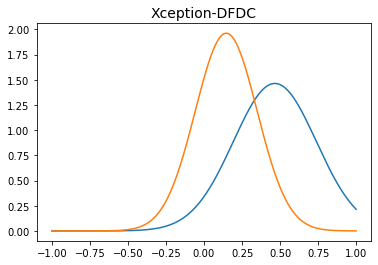

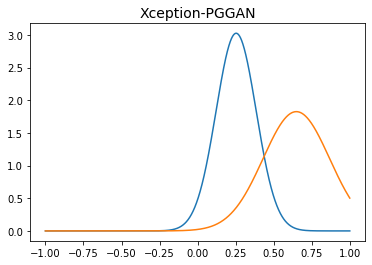

In [14]:
cnt = 0
f_mean,f_std = 0,0
r_mean,r_std = 0,0
for file in sorted(os.listdir('txts/')):
    f = open('txts/'+file,'r')
    # print(f.read()[:100])
    data = [float(x.strip()) for x in f.readlines()]
    cnt+=1
    f.close()
    l = len(data)//2
    
    
    # a, b = get_mean_std([float(x.strip()) for x in f.readlines()])
    f = []+data[:l]
    r = []+data[l:]

    #x-axis ranges from -1 and 1 with .001 steps
    x = np.arange(-1, 1, 0.001)

    #plot normal distribution with mean and standard deviation

    if cnt%5==0:
        y = cnt//5
        f_mean,f_std = get_mean_std(f)
        r_mean,r_std = get_mean_std(r)
        plt.plot(x, norm.pdf(x, f_mean, f_std))
        plt.plot(x, norm.pdf(x, r_mean, r_std))
        plt.title(name[y],fontsize=14)
        f_name = name[y] + '.png'
        plt.savefig('figure/'+f_name)
        plt.show()

In [3]:
for filename in glob.glob(base_dir+'*.txt'):
    mean = 0
    std = 0
    with open(os.path.join(base_dir, filename), 'r')as f:
        text = f.read()
        text = text.split('\n')
        text.remove('')
        data = [float(i) for i in text]
        mean, std = get_mean_std(data)

    file = filename.split('/')[-1].split('.')[0]
    m = file.split(' ')[0].split('_')[1]
    for i, method in enumerate(methods):
        if method == m:
            file = file.split(' ')[-1]
            test_num = int(file[4]) - 1
            file = file.split('_')[-1]
            assert(i < 5)
            assert(test_num < 5)
            if 'fake' == file:
                plots[i][test_num][0] = mean, std
            else:
                assert('real' == file)
                plots[i][test_num][1] = mean, std
            break

print(plots)  

[[[(0.4735836521745409, 0.20991543646256416), (-0.13829881070348746, 0.16083911553592026)], [(0.45456469186696835, 0.21077316639779986), (-0.14495767635987755, 0.1496568476513851)], [(0.5190288916981645, 0.15806665483237337), (-0.14517441978126486, 0.16726120812663373)], [(0.44660988257185563, 0.20390628844489841), (-0.11797924173193468, 0.15942777349808374)], [(0.4631475964921222, 0.1997040319539521), (-0.11073532643353037, 0.17053958614694345)]], [[(0.26394306756662456, 0.2480576226042971), (0.4915525046661546, 0.3178137593845176)], [(0.22179920272894513, 0.24010516129101636), (0.4264193746214851, 0.32917426263198263)], [(0.23913923413421165, 0.23598055194816459), (0.480861982370084, 0.3057137461681912)], [(0.22802805319840402, 0.23200669388132575), (0.47004095172742777, 0.31958083459774783)], [(0.25324366980651236, 0.23801898068656702), (0.5146304562494236, 0.29656981418513423)]], [[(-0.2991882108011231, 0.2770017216369102), (-0.7108004322339027, 0.19182472050817553)], [(-0.39197008

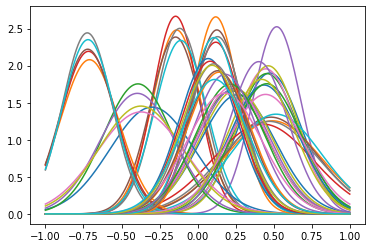

In [4]:
for i in range(len(plots)):
    for j in range(len(plots[i])):
        for k in range(len(plots[i][j])):
            #x-axis ranges from -1 and 1 with .001 steps
            x = np.arange(-1, 1, 0.001)

            #plot normal distribution with mean and standard deviation
            mean, std = plots[i][j][k]
            plt.plot(x, norm.pdf(x, mean, std))

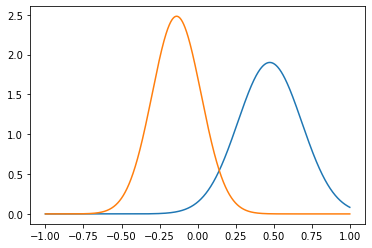

In [5]:
#x-axis ranges from -1 and 1 with .001 steps
x = np.arange(-1, 1, 0.001)

#plot normal distribution with mean and standard deviation
f_mean, f_std = plots[0][4][0]
r_mean, r_std = plots[0][4][1]
plt.plot(x, norm.pdf(x, f_mean, f_std))
plt.plot(x, norm.pdf(x, r_mean, r_std))

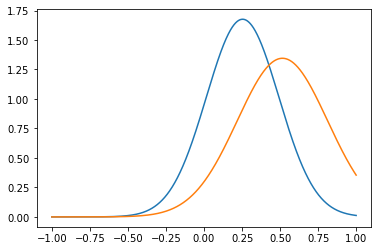

In [6]:
#x-axis ranges from -1 and 1 with .001 steps
x = np.arange(-1, 1, 0.001)

#plot normal distribution with mean and standard deviation
f_mean, f_std = plots[1][4][0]
r_mean, r_std = plots[1][4][1]
plt.plot(x, norm.pdf(x, f_mean, f_std))
plt.plot(x, norm.pdf(x, r_mean, r_std))

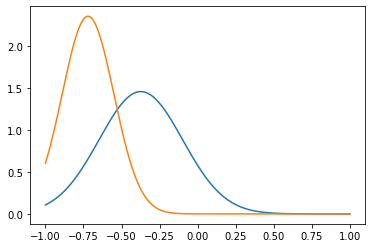

In [7]:
#x-axis ranges from -1 and 1 with .001 steps
x = np.arange(-1, 1, 0.001)

#plot normal distribution with mean and standard deviation
f_mean, f_std = plots[2][4][0]
r_mean, r_std = plots[2][4][1]
plt.plot(x, norm.pdf(x, f_mean, f_std))
plt.plot(x, norm.pdf(x, r_mean, r_std))

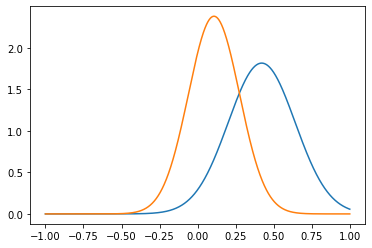

In [8]:
#x-axis ranges from -1 and 1 with .001 steps
x = np.arange(-1, 1, 0.001)

#plot normal distribution with mean and standard deviation
f_mean, f_std = plots[3][4][0]
r_mean, r_std = plots[3][4][1]
plt.plot(x, norm.pdf(x, f_mean, f_std))
plt.plot(x, norm.pdf(x, r_mean, r_std))

In [ ]:
#x-axis ranges from -1 and 1 with .001 steps
x = np.arange(-1, 1, 0.001)

#plot normal distribution with mean and standard deviation
f_mean, f_std = plots[4][4][0]
r_mean, r_std = plots[4][4][1]
plt.plot(x, norm.pdf(x, f_mean, f_std))
plt.plot(x, norm.pdf(x, r_mean, r_std))